In [1]:
import sys
sys.path.append("..") 

from albrowPredictive import AlbrowPredictive
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
def load_data(data_path):
    
    data = np.loadtxt(data_path)
    times = data[:,0]
    mags = data[:,1]
    emags = data[:,2]
    
    return times,mags,emags

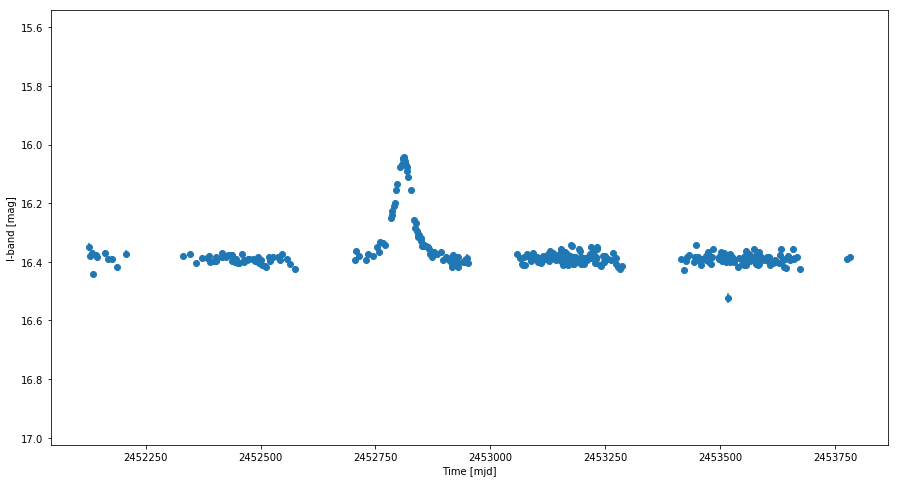

In [3]:
#Load and plot the data
times,mags,emags = load_data('../data/2003/blg-171/phot.dat')
plt.errorbar(times,mags,yerr=emags,fmt='o')
plt.ylim(np.max(mags)+0.5,np.min(mags)-0.5)
plt.xlabel('Time [mjd]')
plt.ylabel('I-band [mag]')
plt.show()

In [4]:
#Split the data into train and test
N = len(times)
L = 72

train_times = times[:L]
train_mags = mags[:L]
train_emags = emags[:L]

test_times = times[L:N]
test_mags = mags[L:N]
test_emags = emags[L:N]

In [5]:
#train the model both the Maximum Likelihood (MLE) predictior and the Maximum a posteriori (MAP) predictor
model = AlbrowPredictive(train_times,train_mags,train_emags)
model.train_MLE()
model.train_MAP()

     fun: -245.5962047235085
     jac: array([-0.00349587,  0.        ,  0.00449347, -0.03271339,  0.00227658])
 message: 'Optimization terminated successfully.'
    nfev: 3477
     nit: 40
 success: True
       x: array([ 1.86366733,  4.08148215,  1.48910796,  0.0318835 , 16.39131808])
     fun: -238.45230331734095
     jac: array([ 0.00742091, -0.00268301,  0.01153353, -0.16246418, -0.08165557])
 message: 'Optimization terminated successfully.'
    nfev: 3876
     nit: 43
 success: True
       x: array([ 1.39471184,  0.20882649,  1.69068311,  0.999     , 16.39102262])


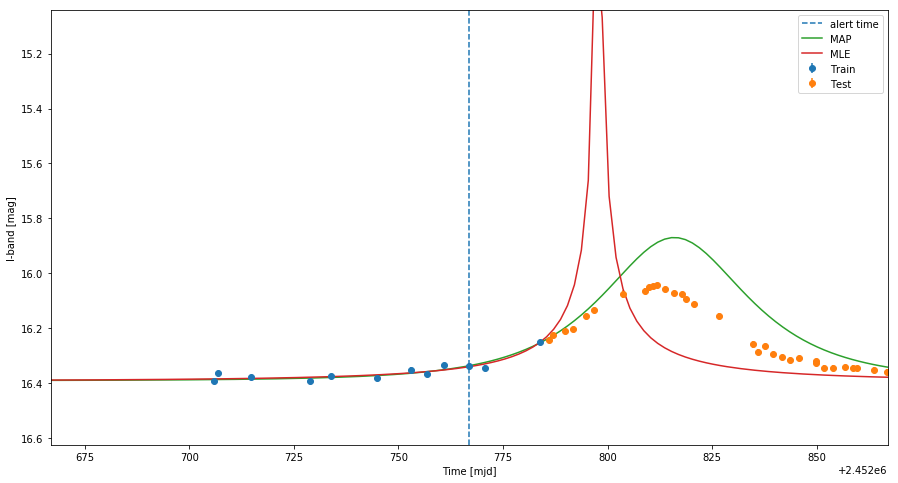

In [6]:
plt.clf()
plt.errorbar(train_times,train_mags,yerr=train_emags,fmt='o',label='Train')
plt.errorbar(test_times,test_mags,yerr=test_emags,fmt='o',label='Test')
plt.axvline(model.alert_time,label="alert time",linestyle="--")
plt.ylim(np.max(mags)+0.1,np.min(mags)-1.0)
plt.xlim(model.alert_time-100,model.alert_time+100)

plt.xlabel('Time [mjd]')
plt.ylabel('I-band [mag]')
time_pred = np.linspace(np.min(times),np.max(times),1000)
plt.plot(time_pred,model.predict_MAP(time_pred),label="MAP")
plt.plot(time_pred,model.predict_MLE(time_pred),label="MLE")
plt.legend()
plt.show()